# Neural Network Regression with Tensorflow

Tensorflow kütüphanemizi import edip hangi sürümde olduğunu kontrol edelim

In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.6.0


## Veriyi oluşturma

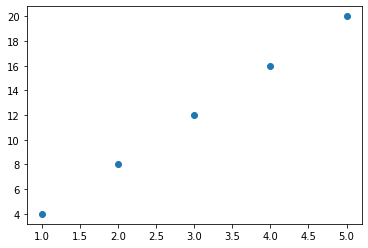

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#ozellikleri tanimliyoruz
X = np.array([1.0,2.0,3.0,4.0,5.0])

#labellari tanimliyalim
y = np.array([4.0,8.0,12.0,16.0,20.0])

#grafige dokelim
plt.scatter(X,y)

Veriler arasinda basit bir iliski var bunu kontrol edebiliriz.

In [ ]:
y == X*4

array([ True,  True,  True,  True,  True])

Burada X bagımsiz, y ise bagimli degiskendir.

* numpy arraylarimizi tensorlere donusturelim ki modelimizin kullanımına uygun olsunlar

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y) , dtype=tf.float32)
#boyutlarina da bakalim
X[0].ndim ,y[0].ndim

(0, 0)

## Tensorflow ile modelleme adimlari

1. Modeli olusturmak --- girdi, cikti ve gizli katmanlari tanimlamak
2. Modeli derlemek --- kayip fonksiyonunu(loss function) , optimizer ve degerlendirme metriklerini(evaluation metrics) tanimlamak
3. Modeli fit etmek --- modelin x ve y arasindaki desen(pattern)leri bulamasi icin denemek




### **Model olusturmak**

In [ ]:
tf.random.set_seed(42)


#1.adim modeli olusturmak icin Sequential API kullandik burda
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

#2. adim derlemek/Compile  model\
model.compile(loss= tf.keras.losses.mae,    #mae = mean absolute error
              optimizer= tf.keras.optimizers.SGD(),  #SGD  = Stochastic Gradient Descent
              metrics=["mae"]
              )

# 3.adim modeli fit etmek
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 276ms/step - loss: 10.2898 - mae: 10.2898
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 10.1898 - mae: 10.1898
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 10.0898 - mae: 10.0898
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 9.9898 - mae: 9.9898
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 9.8898 - mae: 9.8898


**X ve y degerlerimizi tekrar hatirlayip modele bir tahmin yaptiralim**




In [ ]:
X, y

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 3., 4., 5.], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 4.,  8., 12., 16., 20.], dtype=float32)>)

In [ ]:
model.predict([10.0])

array([[7.2505984]], dtype=float32)

10 degeri icin modelimiz cok kotu bir tahminde bulundu. 40 degerini bulmasi gerekirken 7 degerini buldu. Modelimizin tahminleri kotuydu bunu gelistirmeye calisalim

## **Modeli Geliştirmek**

1. **Modeli olustururken gelistirmek** : Daha fazla katman ekleyebilir,  noron sayisini(hidden units) sayisini arttirabilir, her katman icin aktivasyon fonskiyonunu degistirebiliriz.

2. **Modelin derleme asamasinda gelistirmek** : optimizasyon fonksiyonunu degistirebilir , ogrenme orani(learning rate)  degistirilebilir.

3. **Modeli fit etme asamasinda gelistirmek** : daha fazla epoch ile egitime sokabiliriz veya daha fazla veri ile egitebiliriz.

Modeli tekrar olusturalim

In [ ]:
#1.adim modeli olusturmak Sequential API kullandik burda
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

#2. adim derlemek/Compile  model\
model.compile(loss= tf.keras.losses.mae,    #mae = mean absolute error
              optimizer= tf.keras.optimizers.SGD(),  #SGD  = Stochastic Gradient Descent
              metrics=["mae"]
              )

# 3.adim modeli fit etmek
model.fit(X, y, epochs = 100)

#sadece epochs sayisini degistirdik

In [ ]:
model.predict([10.0])

array([[36.720722]], dtype=float32)

Tekrar tahmin etmesini istedigimizde bu sefer cok daha yaklasmis olduk.Bekledigimiz deger 40 idi fakat modelimizin gelisitigini gormus olduk.

Daha fazla gelisitirmek icin degisiklikler yapmaya devam edelim\
Yeni katman ekleyelim.

In [ ]:
#1.adim modeli olusturmak Sequential API kullandik burda
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100,activation = "relu"), #yeni katman ve aktivasyon fonksiyonu ekledik
      tf.keras.layers.Dense(1)
])

#2. adim derlemek/Compile  model\
model.compile(loss= tf.keras.losses.mae,    #mae = mean absolute error
             #optimizeri degistirip learning rate ekledik  cok onemli bir hiperapremetredir
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),  
              metrics=["mae"]
              )

# 3.adim modeli fit etmek
model.fit(X, y, epochs = 100)

Tekrar tahmin yaptiralim

In [ ]:
model.predict([10.0])

array([[40.38787]], dtype=float32)

Bu sefer daha da yaklasmis olduk ve model gelisitirmeye basit bir sekilde bakmis olduk.

### Modeli Degerlendirmek (Evalueta Model )

Basitce calisma mantigimiz sudur

Modeli olusturur --> modeli fit eder --> modeli degerlendirir --> ince ayarlar yapar --> modeli fit eder-- > modeli degerlendirir --> ince ayalarlar yapar ....
seklinde modeli gelsitirerek devam ederiz

Modeli degerlendirmek icin onu dogru sekilde okumamiz gerekir bunun da en iyi yolu gorsellestiremkten gecer

* Veriyi gorsellestirmek -- Calistigimiz veri nedir nasil gorunuyor ?
* Modelin kendisi -- Modelimiz nasil gorunuyor ?
* Ogrenme asamasina bakmak -- Modelimiz ogrenirken nasil performans gosteriyor ?
* Modelin tahminlerine goz atmak -- Modelimiz gercekte ne kadar iyi tahmin yapiyor ?


Daha buyuk bir veri seti olusturalim

In [ ]:
X = tf.range(-100 ,100,4) 
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

Verimiz icin label olsuturalim

In [ ]:
y = X *4
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-400, -384, -368, -352, -336, -320, -304, -288, -272, -256, -240,
       -224, -208, -192, -176, -160, -144, -128, -112,  -96,  -80,  -64,
        -48,  -32,  -16,    0,   16,   32,   48,   64,   80,   96,  112,
        128,  144,  160,  176,  192,  208,  224,  240,  256,  272,  288,
        304,  320,  336,  352,  368,  384], dtype=int32)>

Veriyi gorsellestirelim

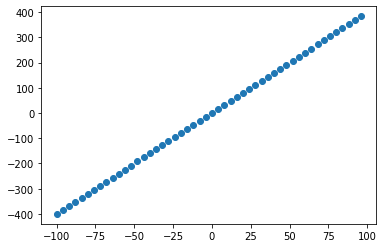

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

Verimizi 3'e ayiralim
* **Egitim kumesi** --> model bu veriden ogrenecektir. Genelde toplam verinin %70-80 inini olsuturur.
* **Dogrulama kumesi** --> modeli bu kumeyi kullanarak gelistirecegiz. %10-15 i olur toplam verinin
* **Test kumesi** --- > modelin neler ogrendigini degerlendirmek icin kullanilir genelde toplam verinin %10-15 ni icerir 


Egitim kumesi --> ders kitabi ve dersler

Dogrulama kumesi --> deneme sinavlarimiz

Test kumesi --> final sinavimiz (yks vb. :()

Dogrulama (Validation) kumesini her zaman kullanmayabiliriz. Elimizde buyuk bir veri kumesi var ise kullaniriz. Kisitli verimiz var ise kullanmamak bizim icin daha iyi olacaktir

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40] #ilk 40 veriyi egitim kumesine ayirdik %80
y_train = y[:40]

X_test = X[40:] #son 10 veriyi de test kumesine ayirmis olduk %20
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Verimizi gorsellestirelim

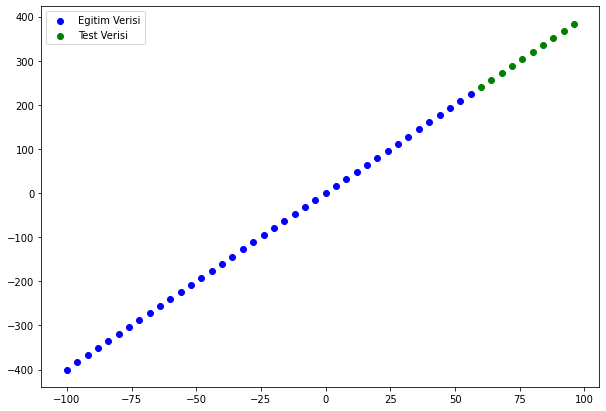

In [ ]:
plt.figure(figsize=(10,7))

#Egitim verisini mavi
plt.scatter(X_train, y_train, c='b', label = "Egitim Verisi")
# test verisini yesil rengle gosterecegiz
plt.scatter(X_test, y_test, c='g', label = "Test Verisi")
#lejant eklemis olduk
plt.legend();

**Modelimize Goz atma asamasi**

In [ ]:
#1.adim modeli olusturmak 
model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, input_shape = [1], name='input_layer'), #input shape yani giridi boyutunu bazen otomatik algilasade kendimiz girmemeiz daha iyi olacaktir
      tf.keras.layers.Dense(1, name= "output_layer")
], name= "Model1")

#2. adim derlemek/Compile  model\
model.compile(loss= tf.keras.losses.mae,             
              optimizer= tf.keras.optimizers.SGD(),  
              metrics=["mae"]
              )

# 3.adim modeli fit etmek
#model.fit(X_train, y_train, epochs = 100)

Modeli fit etmeden once ona goz atmak iyi olacaktir

In [ ]:
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params: modeldeki toplam parametre sayisidir.

* Trainable params: bu parametreler model ogrenirken guncellenen parametrelerdir.

* Non-trainable params: Modelimize daha onceden egitilmis (preetrained model) ekleersek zaten egitilmis olduklari icin  o modelin parametreleri egitilmeyecektir. Bu sayida onu belirtiyor. **Transfer Learning**




Modeli fit edelim

In [ ]:
model.fit(X_train, y_train, epochs = 100,verbose=0) #verbos degiskeni model egitilirken cikti olan loglarin nasil olacagini belirler

In [ ]:
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Modelimize gorsel acidan bakalim

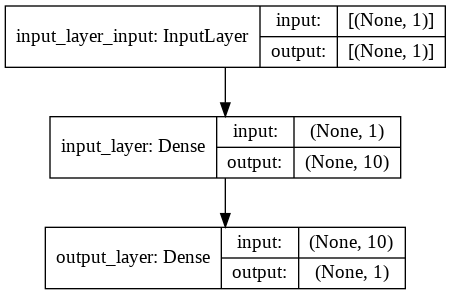

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Modelin tahminlerini gorsellestirmek

In [ ]:
#modelimizin test seti uzerindeki tahminleree bakalim
y_pred = model.predict(X_test)
y_pred

array([[272.81207],
       [291.01312],
       [309.2141 ],
       [327.41513],
       [345.61618],
       [363.8172 ],
       [382.01822],
       [400.21924],
       [418.42026],
       [436.62128]], dtype=float32)

In [ ]:
#olmasi gereken degerlere bakalim bunlara labelda diyebiliriz
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([240, 256, 272, 288, 304, 320, 336, 352, 368, 384], dtype=int32)>

Bunlari gorsellestirelim. Fonksiyon yazip bunu tekrar kullanabiliriz

In [ ]:
def plot_predictions(train_data ,
                     train_labels ,
                     test_data ,
                     test_labels,
                     predictions ):
  plt.figure(figsize=(10,7))
  #plt.scatter(train_data, train_labels, c="b",label ="Egitim Verisi")
  plt.scatter(test_data, test_labels, c="g",label ="Test Verisi")
  plt.scatter(test_data, predictions, c="r",label ="Tahminler")
  plt.legend();

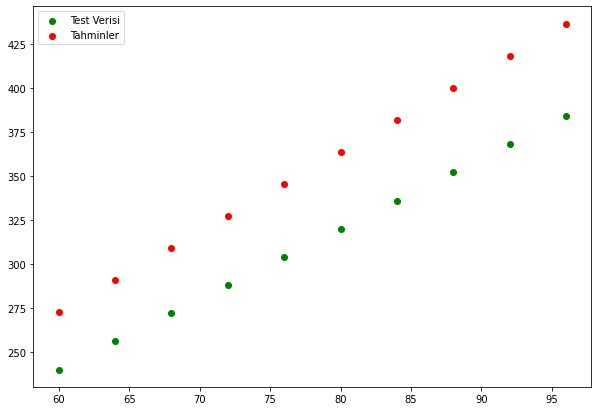

In [ ]:
plot_predictions(train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test,
                predictions = y_pred)

Tahminler gayet iyi oldugu icin yesil nokatarimiz cok az gorunuyor. Fonksiyonumuzdaki # i kaldirip egitim verisinide gorsellestirebiliriz

### Modelimizin performansini degerlendirmek icin cesitli metriclere bakalim.()

mae veya mase gibi

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 126ms/step - loss: 42.7167 - mae: 42.7167


[42.716678619384766, 42.716678619384766]

loss fonk nunuda metrici de mae sectigimiz icin ayni degerleri donduler

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([272.81207, 291.01312, 309.2141 , 327.41513, 345.61618, 363.8172 ,
       382.01822, 400.21924, 418.42026, 436.62128], dtype=float32)>

In [ ]:
#mean absolute error u hesaplayalim (mae)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae 

<tf.Tensor: shape=(), dtype=float32, numpy=42.716682>

goruldugu gibi evaluate fonksiyonu ile ayni ciktiyi almis olduk

In [ ]:
#mean square error u hesaplayalim bu da bir metrictir
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1864.682>

In [ ]:
#bunlari bir fonksiyon seklinde yazalim tekrar kullanabilmek icin

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true= y_test,
                                        y_pred= tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true= y_test,
                                        y_pred= tf.squeeze(y_pred))
  #tf.squeeze metodunu verilerimizin shapeini benzetmek icin kullaniyoruz

# Ogrendiklerimizi uygulayalim

3 tane farkli model gelistirelim
 1. "model_1" - 1 katman(layer) ve 100 epochs ta egitelim.
 2. "model_2" - 2 katman(layer) ve 100 epochs ta egitelim.
 3. "model_3" - 2 katman (layer) ve 500 epochs ta egitelim

**model_1** i yapalim

In [ ]:
 #1modelin tanimlayalim
model_1 =tf.keras.Sequential([                      
          tf.keras.layers.Dense(1)
])

#modeli compile edelim
model_1.compile(loss = tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#modeli fit edelim
model_1.fit(X_train ,y_train, epochs = 100)

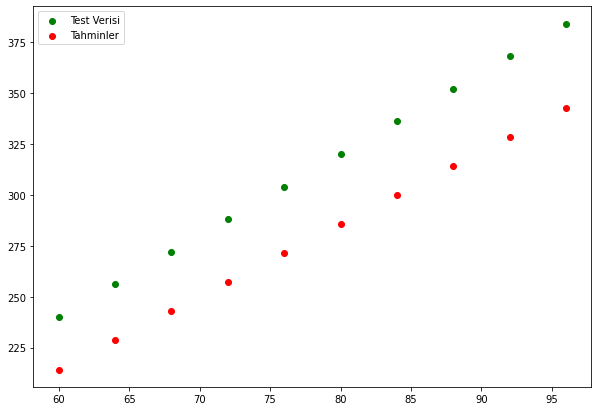

In [ ]:
#yukarida yazdigimiz fonksiyonu kullanarak cizdirelim
y_pred_1 = model_1.predict(X_test)

plot_predictions(train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test,
                predictions = y_pred_1)

In [ ]:
#model_1 icin degerlendirme metriklerine bakalim
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=33.492638>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1146.1062>)

**model_2**

* 2 dense layers , 100 epochs

In [ ]:
#modelin tanimlayalim
model_2 =tf.keras.Sequential([                      
          tf.keras.layers.Dense(10), #10 tane gizli katman(hidden layer) ekleyelim 
          tf.keras.layers.Dense(1)
])

#modeli compile edelim
model_2.compile(loss = tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#modeli fit edelim
model_2.fit(X_train ,y_train, epochs = 100)

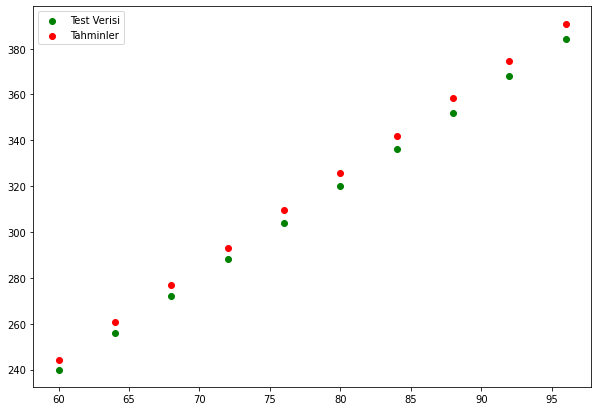

In [ ]:
#yukarida yazdigimiz fonksiyonu kullanarak cizdirelim
y_pred_2 = model_2.predict(X_test)

plot_predictions(train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test,
                predictions = y_pred_2)

Grafikleri karsilastigimizda ekledigimiz katman ile model daha iyi bir performans sergiledigini gorebiliriz

In [ ]:
#model_2 icin degerlendirme metriklerine bakalim
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=5.608266>,
 <tf.Tensor: shape=(), dtype=float32, numpy=32.146828>)

**model_3**

* 2 layers , 500 epochs

In [ ]:
#modelin tanimlayalim
model_3 =tf.keras.Sequential([                      
          tf.keras.layers.Dense(10), #10 tane gizli katman(hidden layer) ekleyelim 
          tf.keras.layers.Dense(1)
])

#modeli compile edelim
model_3.compile(loss = tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#modeli fit edelim
model_3.fit(X_train ,y_train, epochs = 500)

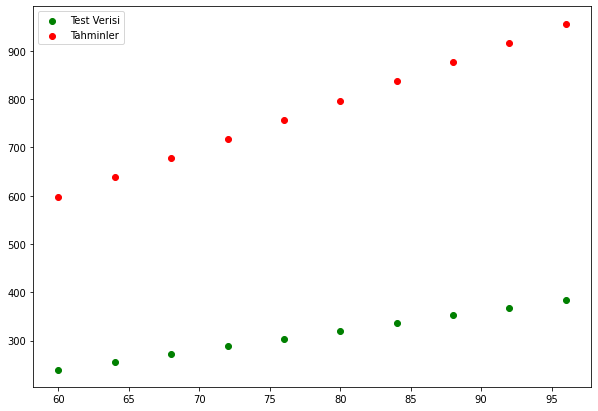

In [ ]:
#yukarida yazdigimiz fonksiyonu kullanarak cizdirelim
y_pred_3 = model_3.predict(X_test)

plot_predictions(train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test,
                predictions = y_pred_3)

Grafikte gordugumuz gibi model_3 en kotu performansa sahip modelimiz oldu. Modelimizin epochs sayisi cok fazla geldi. Modelimiz verileri fazlasiyla gormesiyle verileri ezberleme basladi. Bu bizi overfitting (asiri ogrenme) sorunuyla karsilastirdi.

In [ ]:
#model_2 icin degerlendirme metriklerine bakalim
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3 , mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=465.04266>,
 <tf.Tensor: shape=(), dtype=float32, numpy=220952.2>)

# Modellerimizi karsilastiralim

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results


,model,mae,mse
0,model_1,33.492638,1146.106201
1,model_2,5.608266,32.146828
2,model_3,465.042664,220952.203125


en iyi modelimiz model_2 oldu onu inceleyelim

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Modeli kaydetmek

In [ ]:
model_2.save("model_2") #modeli kaydetmek icin nereye edecegini yazdik

INFO:tensorflow:Assets written to: model_2/assets


farkli bir formatta edelim

In [ ]:
model_2.save("model_2_HDF5_format.h5")

modelin dogru kaydedildigini kontrol etmek icin kaydedilmis modeli yukleyelim

In [ ]:
loaded_model_2 = tf.keras.models.load_model("/content/model_2_HDF5_format.h5")
#sadece ice aktaracagimiz modelin dosya yolunu yazdik

In [ ]:
loaded_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


goruldugu uzere ayni modeller

In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_model_preds = loaded_model_2.predict(X_test)
model_2_preds == loaded_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

gordugunuz gibi yaptiklari tahminlerde birbirine esit